<a href="https://colab.research.google.com/github/ShreyasKulkarni26/Fin2/blob/main/Startegies_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calendar spread
A Calendar Spread can be set-up by:

Selling/short 1 option (front month)

*   Selling/short 1 option (front month)
*   Buying/long 1 option (back month)
*   Both options should be of the same type i.e. either Put or Call
*   Both options should have the same strike price
*   Based on the same underlying asset


 Ideal Profit is obtained when the short option expires worthless and IV expands in the long option. Max Profit and Breakeven can't be calculated as both the options have different expiry dates. Potential profit cannot be calculated as the option expire at different times

Max Loss or risk is equal to the initial net debit paid to establish the trade. If the stock price moves dramatically or too far from the strikes, the trade will cause a loss. If all options have the same expiry date, it is indicated by straight lines and sharp angles. Because of the different expiry period of the calls, the lines are not straight.

In [2]:
pip install mibian

  Preparing metadata (setup.py) ... done
  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4025 sha256=4649f18fccb0b81414f7ed8f6df1c68715fcb93845d2a97ed0dc88b91942ff60
  Stored in directory: /root/.cache/pip/wheels/2c/4f/a7/be034e17cc306b0850f5f1a5b4541281b49475c58620a7ff40
Successfully built mibian


In [3]:
# Data manipulation
import numpy as np
import pandas as pd

# To plot
import matplotlib.pyplot as plt
import seaborn

# BS Model
import mibian

In [8]:
# Nifty futures price
nifty_jul_fut = 11030.50
nifty_aug_fut = 11046.40

strike_price = 11000
jul_call_price = 85.20
aug_call_price = 201.70
setup_cost = aug_call_price - jul_call_price

# Today's date is 20 July 2018. Therefore, days to July expiry is 7 days and days to August expiry is 41 days.
days_to_expiry_jul_call = 7
days_to_expiry_aug_call = 41

# Range of values for Nifty
sT = np.arange(0.92*nifty_jul_fut, 1.1*nifty_aug_fut, 1)

# interest rate for input to Black-Scholes model
interest_rate = 0.0

In [5]:
# Front-month IV
jul_call_iv = mibian.BS([nifty_jul_fut, strike_price, interest_rate, days_to_expiry_jul_call],
                        callPrice=jul_call_price).impliedVolatility
print("Front Month IV %.2f" % jul_call_iv, "%")

# Back-month IV
aug_call_iv = mibian.BS([nifty_aug_fut, strike_price, interest_rate, days_to_expiry_aug_call],
                        callPrice=aug_call_price).impliedVolatility
print("Back Month IV %.2f" % aug_call_iv, "%")

Front Month IV 11.32 %
Back Month IV 12.05 %


In [6]:
# Changing days to expiry to a day before the front-month expiry
days_to_expiry_jul_call = 0.001
days_to_expiry_aug_call = 41 - days_to_expiry_jul_call

df = pd.DataFrame()
df['nifty_price'] = sT
df['jul_call_price'] = np.nan
df['aug_call_price'] = np.nan

# Calculating call price for different possible values of Nifty
for i in range(0, len(df)):
    df.loc[i, 'jul_call_price'] = mibian.BS([df.iloc[i]['nifty_price'], strike_price, interest_rate, days_to_expiry_jul_call],
                                            volatility=jul_call_iv).callPrice

    # Since, interest rate is considered 0%, 35 is added to the nifty price to get the Nifty August futures price.
    df.loc[i, 'aug_call_price'] = mibian.BS([df.iloc[i]['nifty_price']+35, strike_price, interest_rate, days_to_expiry_aug_call],
                                            volatility=aug_call_iv).callPrice
df.head()

,nifty_price,jul_call_price,aug_call_price
0,10148.06,0.0,4.585780
1,10149.06,0.0,4.615164
2,10150.06,0.0,4.644711
3,10151.06,0.0,4.674422
4,10152.06,0.0,4.704298


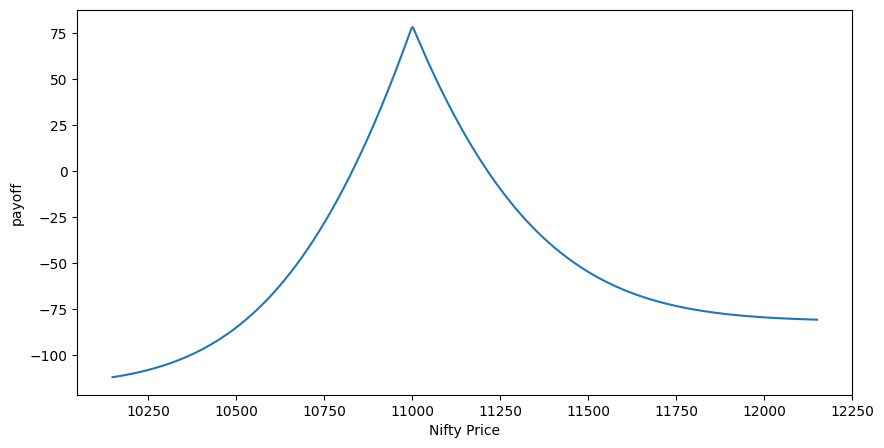

In [7]:
df['payoff'] = df.aug_call_price - df.jul_call_price - setup_cost
plt.figure(figsize=(10, 5))
plt.ylabel("payoff")
plt.xlabel("Nifty Price")
plt.plot(sT, df.payoff)
plt.show()

# Collar

A Collar, also known as a Hedge Wrapper, is a type of a protective options trading strategy. They protect against enormous losses, but at the same time prevent enormous gains as well.

It is a Covered Call position, with an additional Protective Put to collar the value of a security position between 2 bounds. The Collar Options Trading Strategy can be constructed by holding shares of the underlying simultaneously and buying put call options and selling call options against the held shares. One can hedge against the potential downside in the shares by buying the underlying and simultaneously buying a put option below the current price and selling a call option above the current price.

Collar Trading Strategies have a widespread usage. Conservative Investors find it to be a good trade-off to limit profits in return for limited losses and Portfolio managers use it to protect their position in the market, while some investors practise it as it reduces the price of the protective put.

* Buy 1 OTM Put option (Put collar) - lower limit - for protection
* Sell 1 OTM Call option (Call collar) - upper limit

In [29]:
# IDBI Bank Ltd stock price
spot_price = 70.65
# Long put
strike_price_long_put = 65
premium_long_put = 2
# Short call
strike_price_short_call = 75
premium_short_call = 3.25
# Stock price range at expiration of the put
sT = np.arange(0,2*spot_price,1)

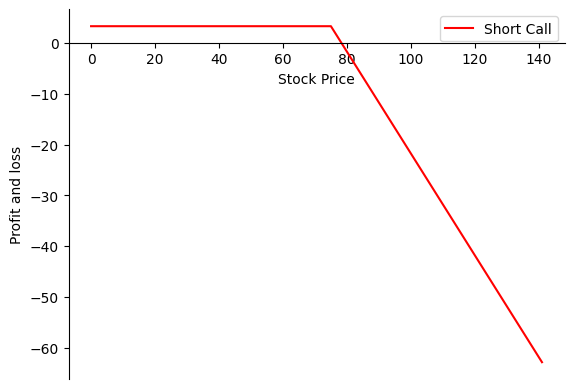

In [30]:
def call_payoff(sT, strike_price, premium):
  return np.where(sT < strike_price, premium,+ premium -sT + strike_price)

payoff_short_call = call_payoff (sT, strike_price_short_call, premium_short_call)
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,payoff_short_call,label='Short Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


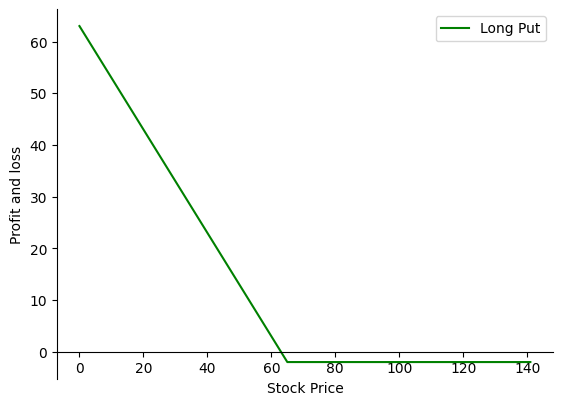

In [31]:
def put_payoff(sT, strike_price, premium):
  return np.where(sT < strike_price, strike_price - sT, 0) - premium

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,payoff_long_put,label='Long Put',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Max Profit: 66.25
Max Loss: -64.75


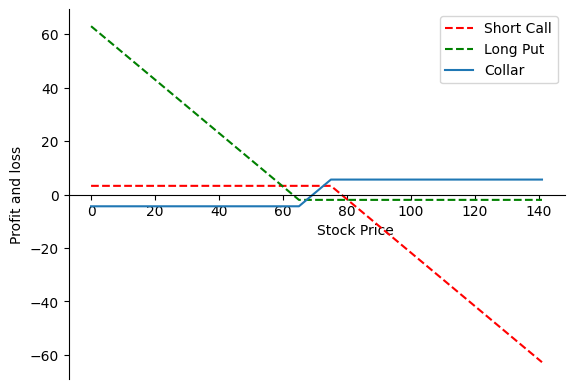

In [32]:
payoff_collar = payoff_short_call + payoff_long_put

print ("Max Profit:", max(payoff_collar))
print ("Max Loss:", min(payoff_collar))
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,payoff_short_call,'--',label='Short Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')

ax.plot(sT,payoff_collar+sT-spot_price,label='Collar')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

# Butterfly Spread
Its properties are listed as follows:

It is a three-leg strategy

*   Involves Buying or selling of Call/Put options
*   Can be constructed using Calls or Puts
* 4 options contracts at the same expiry date
* Have the same underlying asset
* 3 different Strike Prices are involved (2 have the same strike price)
* Create 2 Trades with these calls

Buy 1 ITM call (buy at lower strike price, close at expiry with max profit), sell 2 ATM calls (sold at middle strike price, generates revenue expires worthless) and buy 1 OTM call (buy at higher strike price, expires worthless).

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [12]:
def call_payoff (sT, strike_price, premium):
  return np.where(sT> strike_price, sT-strike_price, 0)-premium
# Spot Price
s0 = 40

# Long Call
higher_strike_price_long_call = 35
lower_strike_price_long_call=30

premium_higher_strike_long_call = 0.85
premium_lower_strike_long_call = 3.15

# Short Call

strike_price_short_call = 32.5
premium_short_call = 1.80

# Range of call option at expiration
sT = np.arange(10,60,1)

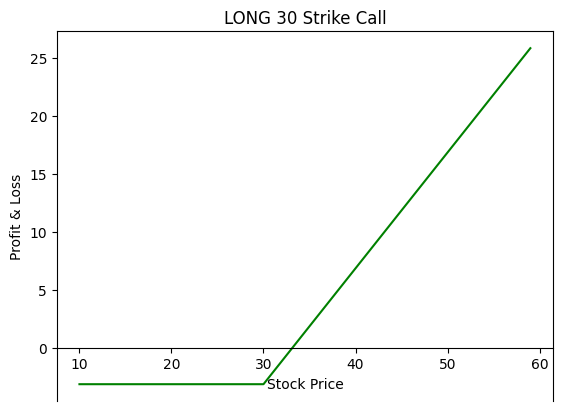

In [13]:
# OTM Strike Long Call Payoff
lower_strike_long_call_payoff = call_payoff(sT, lower_strike_price_long_call, premium_lower_strike_long_call)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,lower_strike_long_call_payoff, color='g')
ax.set_title('LONG 30 Strike Call')
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

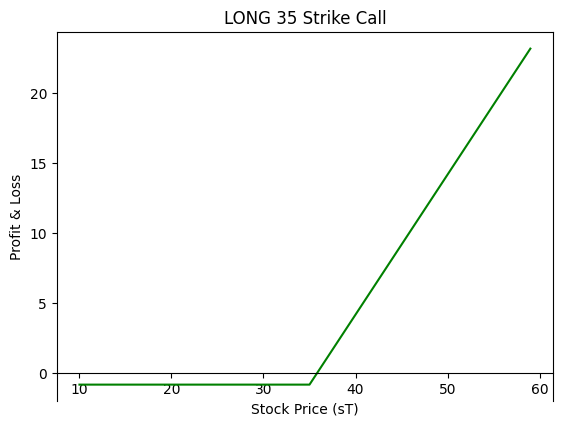

In [14]:
# Higher Strike Long Call Payoff
higher_strike_long_call_payoff = call_payoff(sT, higher_strike_price_long_call, premium_higher_strike_long_call)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,higher_strike_long_call_payoff, color='g')
ax.set_title('LONG 35 Strike Call')
plt.xlabel('Stock Price (sT)')
plt.ylabel('Profit & Loss')
plt.show()

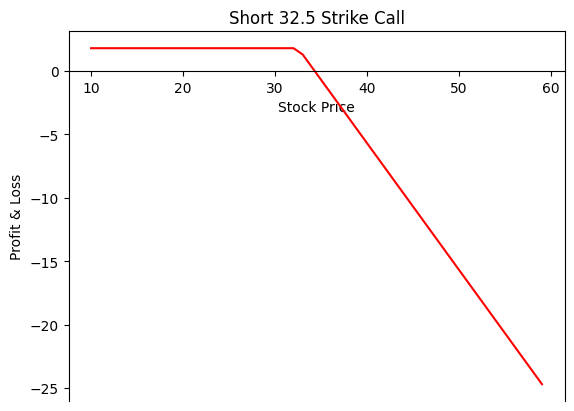

In [15]:
# Short Call Payoff
Short_call_payoff = call_payoff(sT, strike_price_short_call, premium_short_call)*-1.0

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT, Short_call_payoff, color='r')
ax.set_title('Short 32.5 Strike Call')
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

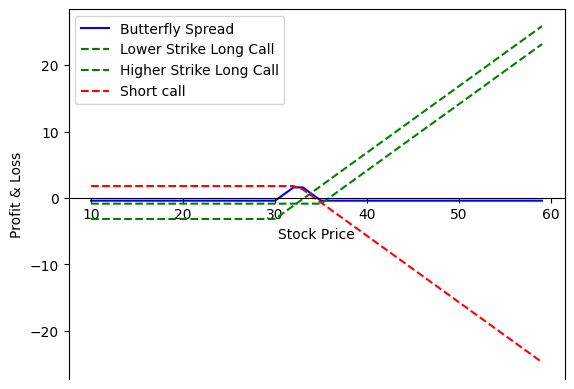

In [16]:
Butterfly_spread_payoff = lower_strike_long_call_payoff + higher_strike_long_call_payoff + 2 *Short_call_payoff

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,Butterfly_spread_payoff ,color='b', label= 'Butterfly Spread')
ax.plot(sT, lower_strike_long_call_payoff,'--', color='g',label='Lower Strike Long Call')
ax.plot(sT, higher_strike_long_call_payoff,'--', color='g', label='Higher Strike Long Call')
ax.plot(sT, Short_call_payoff, '--', color='r', label='Short call')
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

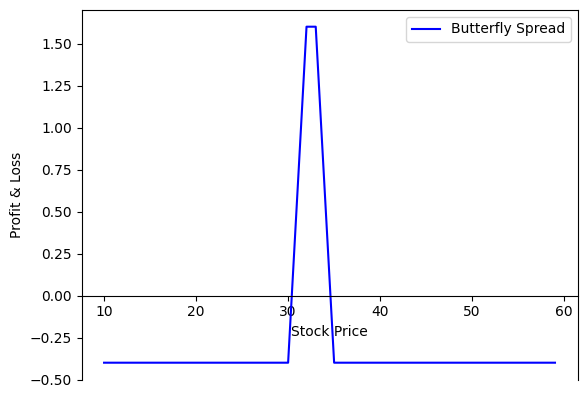

1.60
-0.40


In [19]:
Butterfly_spread_payoff = lower_strike_long_call_payoff + higher_strike_long_call_payoff + 2 *Short_call_payoff

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,Butterfly_spread_payoff ,color='b', label= 'Butterfly Spread')
plt.legend()
plt.xlabel('Stock Price')
plt.ylabel('Profit & Loss')
plt.show()

profit = max(Butterfly_spread_payoff)
loss = min(Butterfly_spread_payoff)

print ("%.2f" %profit)
print ("%.2f" %loss)

# Iron Condor
Sell 1 OTM Put (Higher Strike), Sell 1 OTM Call (Lower Strike), Buy 1 OTM Put (Lower Strike) & Buy 1 OTM Call (Higher Strike)
Profit: Net premium received
Loss: Strike Price of Long Call - Strike Price of Short Call - Net Premium Received or Strike Price of Short Put - Strike Price of Long Put - Net Premium Received whichever is higher

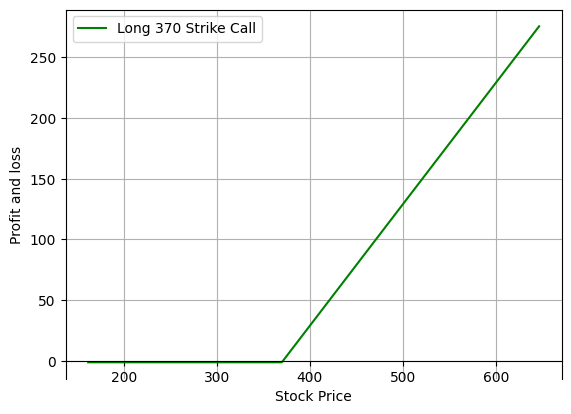

In [21]:
def call_payoff(sT, strike_price, premium):
  return np.where(sT > strike_price, sT - strike_price, 0) - premium
# Stock price
spot_price = 323.40
# Long call
strike_price_long_call = 370
premium_long_call = 1.30
# Short call
strike_price_short_call = 350
premium_short_call = 3.30
# Stock price range at expiration of the call
sT = np.arange(0.5*spot_price,2*spot_price,1)

payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Long 370 Strike Call',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
#ax.spines['top'].set_visible(False) # Top border removed
#ax.spines['right'].set_visible(False) # Right border removed
#ax.tick_params(top=False, right=False) # Removes the tick-marks on the RHS
plt.grid()
plt.show()

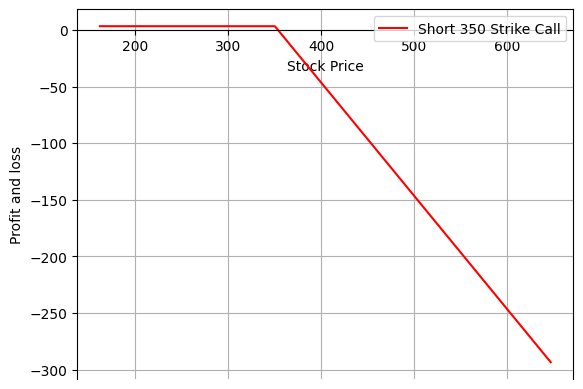

In [22]:
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 350 Strike Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.grid()
plt.show()

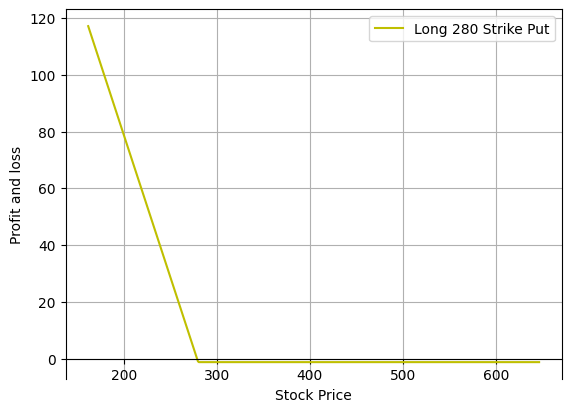

In [24]:
def put_payoff(sT, strike_price, premium):
  return np.where(sT < strike_price, strike_price - sT, 0) - premium
# Stock price
spot_price = 323.40
# Long put
strike_price_long_put = 280
premium_long_put = 1.20
# Short put
strike_price_short_put = 300
premium_short_put = 3.40
# Stock price range at expiration of the put
sT = np.arange(0.5*spot_price,2*spot_price,1)

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,label='Long 280 Strike Put',color='y')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.grid()
plt.show()

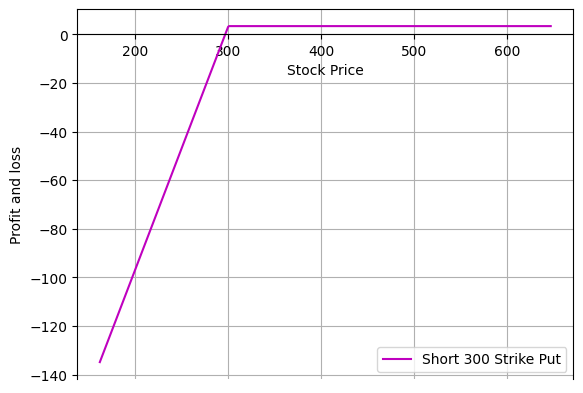

In [25]:
payoff_short_put = put_payoff(sT, strike_price_short_put, premium_short_put) * -1.0

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_put,label='Short 300 Strike Put',color='m')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.grid()
plt.show()

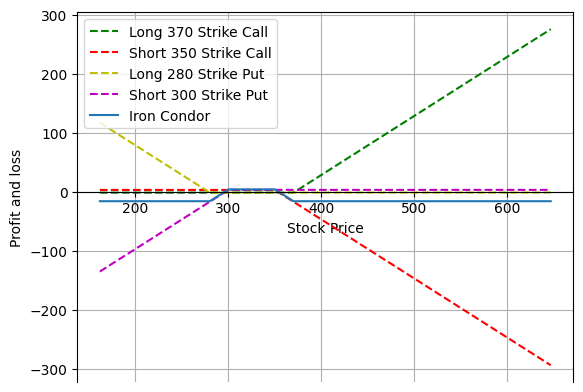

4.199999999999999
-15.800000000000004


In [28]:
payoff = payoff_long_call + payoff_short_call + payoff_long_put + payoff_short_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,'--',label='Long 370 Strike Call',color='g')
ax.plot(sT,payoff_short_call,'--',label='Short 350 Strike Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long 280 Strike Put',color='y')
ax.plot(sT,payoff_short_put,'--',label='Short 300 Strike Put',color='m')
ax.plot(sT,payoff,label='Iron Condor')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.grid()
plt.show()

profit = max(payoff)
print(profit)
loss = min(payoff)
print(loss)

# Bull Call Spread (Vertical Spread)

The bull call spread strategy involves options on the same underlying security, with the same expiration date, but with different strike prices. Therefore, this strategy is also known as a "Vertical Spread". Buy 1 OTM strike call, Sell 1 OTM strike call.

Profit maximum = Strike Price of Short Call - Strike Price of Long Call-Net Premium Paid
Loss maximum = Net Premium Paid



In [33]:
def call_payoff(sT, strike_price, premium):
  return np.where(sT > strike_price, sT - strike_price, 0) - premium


SyntaxError: invalid character '–' (U+2013) (<ipython-input-33-973efb910c73>, line 2)

In [34]:
#Infosys stock price
spot_price = 1130
# Long call
strike_price_long_call = 1160
premium_long_call = 20
# Short call
strike_price_short_call = 1200
premium_short_call = 11
# Stock price range at expiration of the call
sT = np.arange(0.95*spot_price,1.1*spot_price,1)

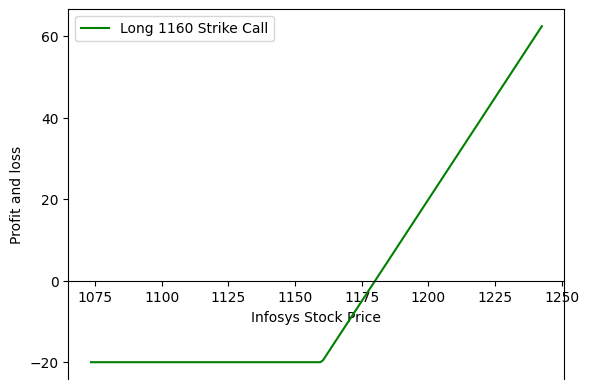

In [36]:
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call) * -1.0
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Long 1160 Strike Call',color='g')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

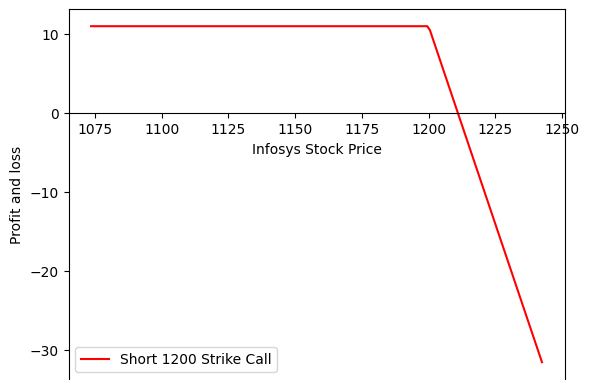

In [38]:
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call)
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 1200 Strike Call',color='r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


Max Profit: 31.0
Max Loss: -9.0


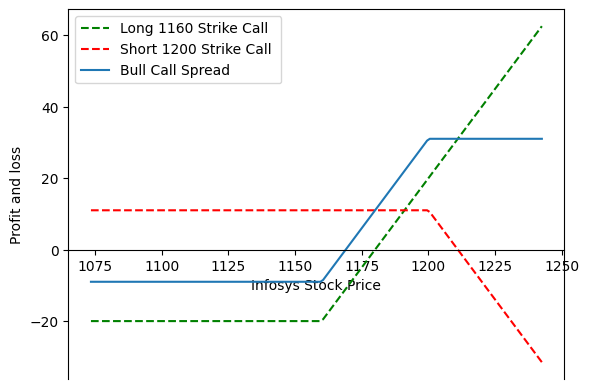

In [40]:
payoff_bull_call_spread = payoff_long_call + payoff_short_call

print("Max Profit:", max(payoff_bull_call_spread))
print("Max Loss:", min(payoff_bull_call_spread))
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,'--',label='Long 1160 Strike Call',color='g')
ax.plot(sT,payoff_short_call,'--',label='Short 1200 Strike Call ',color='r')
ax.plot(sT,payoff_bull_call_spread,label='Bull Call Spread')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


# Bear Put Spread